## Initial Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.options.display.max_columns = None
import backend as bk

## Import the file and reset index

In [2]:
df = pd.read_excel('Competition1_raw_data.xlsx', na_values='-')
df.set_index('I1', inplace=True)
df.head(5)

,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
I1,,,,,,,,,,,,,,,,,,,,,
AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


## Seing what data we have to work with

In [3]:
print('Checking the shape of our data \n')
print(df.shape)

print('Checking the data types we have \n')
print(df.dtypes)

print('Checking for missing values \n')
print(df.isna().sum())

Checking the shape of our data 

(682, 21)
Checking the data types we have 

I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object
Checking for missing values 

I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
dtype: int64


## Getting the data in the right formats

In [4]:
#need to convert these rows to the values as indicated by the Data Dictionary 

to_float = ['I3','P(IPO)','P(H)', 'P(L)', 'P(1Day)', 'C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3']

for col in to_float:
    df[col]=pd.to_numeric(df[col], errors='coerce')
df['C2'] = df['C2'].astype('bool') 
print(df.dtypes)

I2          object
I3         float64
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2            bool
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object


dropping our missing predicotr variables

In [5]:
df = df.dropna(subset=['P(1Day)'])
print(df.isna().sum())

I2          0
I3          4
P(IPO)      0
P(H)        0
P(L)        0
P(1Day)     0
C1          0
C2          0
C3         24
C4          0
C5          0
C6          0
C7         60
T1          0
T2          0
T3          0
T4          0
T5          0
S1          0
S2          0
S3          0
dtype: int64


## Cheking Distribution for the variables we have missing data for

Used to determine our imputation approach

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


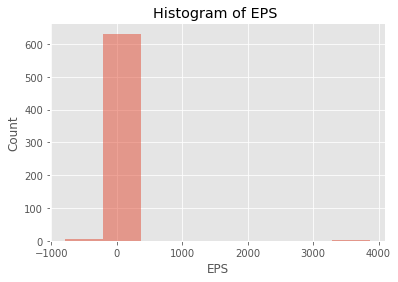

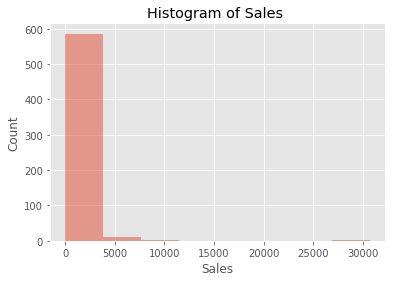

In [6]:
plt.hist(df["C3"], bins=8, alpha=0.5)
plt.xlabel('EPS')
plt.ylabel('Count')
plt.title('Histogram of EPS ')
plt.show()
plt.hist(df["C7"], bins=8, alpha=0.5)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Histogram of Sales ')
plt.show()

Seeing how our data is pretty heavily skwewed, we need to normalize our data before we can impute our missing C3 and C7 values

## Creating Our Needed Variables

In [7]:
## Creating Necessary Variables Y1, Y2, C3', C5', and C6'
## Code found on https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column
df['P(Mid)'] = (df['P(H)'] + df['P(L)']) / 2
df['Y1'] = np.where(df['P(IPO)'] < df['P(Mid)'], 1,0)
df['Y2'] = np.where(df['P(IPO)'] < df['P(1Day)'], 1,0)
df["C3_Prime"] = np.where(df['C3'] > 0, 1, 0)
df["C5_Prime"] = df['C5'] / df['C6']
df["C6_Prime"] = np.where(df['P(IPO)'] > df['P(Mid)'], ((df['P(IPO)'] - df['P(Mid)']) / df['P(Mid)']) * 100,0)
df.head(1)

,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,P(Mid),Y1,Y2,C3_Prime,C5_Prime,C6_Prime
I1,,,,,,,,,,,,,,,,,,,,,,,,,,,
AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.87,122.0,True,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,9.0,0,1,1,3.864345,11.111111


Dealing with binning our I2 column. First we want to see what we are working with

In [8]:
df['industry'] = df['I3'].apply(bk.assign_sector)
df['industry'].value_counts()

Manufacturing                              296
Services                                   200
Transportation/Communications/Utulities     58
Retail Trade                                48
Mining                                      31
Wholesale Trade                             13
Finance/Insurance/Realestate                 5
Non Classafiable Establishments              2
Agriculture/Forestry/Fishing                 2
Construction                                 1
Name: industry, dtype: int64

We want to assign our secotrs numerical values as well as deal with our missing values from before in our I2 Column. The reason these values were 'missing' is because there were multiple values assigned to a single company. We will impute these as 'other'

In [9]:

df['industry'] = df['industry'].replace(['Mining', 'Wholesale Trade', 'Finance/Insurance/Realestate', 'Non Classafiable Establishments',
                                            'Agriculture/Forestry/Fishing', 'Construction', 'NaN'],'Other')
df['industry'].value_counts()

df['industry'] = df['industry'].replace({'Manufacturing': 1, 'Services': 2, 'Transportation/Communications/Utulities': 3, 'Retail Trade': 4,'Other': 5})
df.head(1)

,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,P(Mid),Y1,Y2,C3_Prime,C5_Prime,C6_Prime,industry
I1,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.87,122.0,True,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,9.0,0,1,1,3.864345,11.111111,1.0


In [10]:
#imputing missing industry values with 'other' and checking to make sure no more missing values
df['industry'] = df['industry'].fillna(5)
df['industry'].isna().sum()

0

## Next we want to make some ratio values for our text analysis of IPO filings

Before we do this though, we need to fix some of our missing data in T2

In [11]:
t2_mean = df['T2'].mean()
df['T2'] = np.where(df['T2'] ==0, t2_mean, df['T2'])
print(t2_mean)

df["S1_Prime"]= df['S1']/df['T2']
df["S2_Prime"]= df['S2']/df['T2']
df["S3_Prime"]= df['S3']/df['T2']
df["T3_Prime"]= df['T3']/df['T2']
df["T4_Prime"]= df['T4']/df['T1']
df["T5_Prime"]= df['T5']/df['T2']

df.head(3)

12849.70303030303


,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,P(Mid),Y1,Y2,C3_Prime,C5_Prime,C6_Prime,industry,S1_Prime,S2_Prime,S3_Prime,T3_Prime,T4_Prime,T5_Prime
I1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.87,122.0,True,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,9.0,0,1,1,3.864345,11.111111,1.0,0.004875,0.009199,0.010929,0.908876,0.640426,0.054250
ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.25,259.0,False,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,9.0,1,0,0,12.028832,0.000000,1.0,0.003258,0.011105,0.010876,0.898724,0.644753,0.051395
ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.70,90.0,True,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,13.0,1,0,0,3.369134,0.000000,1.0,0.011593,0.006271,0.011403,0.909350,0.636816,0.061764


We also are going to drop our I2 and I3 column so that all our data moving forward will be numeric and we have no missing data

In [12]:
df = df.drop(columns = ['I2', 'I3'])
df.head(1)

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,P(Mid),Y1,Y2,C3_Prime,C5_Prime,C6_Prime,industry,S1_Prime,S2_Prime,S3_Prime,T3_Prime,T4_Prime,T5_Prime
I1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AATI,10.0,9.5,8.5,11.87,122.0,True,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,9.0,0,1,1,3.864345,11.111111,1.0,0.004875,0.009199,0.010929,0.908876,0.640426,0.05425


## Impute the rest of our missing/messed up data

We need to make sure that our data is ready to be normalized and all set. Lets look to make sure it makes sense

## Now we want to normalize our data
We also have to impute our missing data for C3 and C7 once we normalize them and get their means. We will start there. 

In [13]:
df.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,P(Mid),Y1,Y2,C3_Prime,C5_Prime,C6_Prime,industry,S1_Prime,S2_Prime,S3_Prime,T3_Prime,T4_Prime,T5_Prime
count,660.000000,660.000000,660.000000,660.000000,660.000000,636.000000,660.000000,6.600000e+02,6.600000e+02,600.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,14.034621,15.610394,13.635394,25.934766,149.728788,0.069242,0.007282,4.996285e+07,1.258248e+07,506.948305,468.701515,12888.641524,11463.393939,295.957576,669.890909,68.675758,120.896970,145.516667,14.622894,0.500000,0.698485,0.477273,4.417255,5.404645,2.048485,0.005308,0.009055,0.011516,0.891504,0.626720,0.052171
std,5.954214,6.613816,5.790112,73.234948,152.817467,161.355821,0.033318,1.055377e+08,2.539940e+07,1661.058320,176.374430,5415.681452,4867.297323,122.172959,298.268982,39.410385,85.542267,69.824545,6.187137,0.500379,0.459264,0.499862,5.133537,10.877569,1.272118,0.001755,0.002990,0.002842,0.071672,0.077686,0.007347
min,5.000000,0.000000,5.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,8.000000e+05,0.074000,132.000000,3271.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,40.000000,4.000000,0.000000,0.000000,0.000000,0.283223,0.000000,1.000000,-0.000093,0.002152,0.005326,0.000000,0.000000,-0.000089
25%,10.000000,13.000000,11.000000,11.000000,85.000000,-0.860000,-0.013927,1.877568e+07,5.124546e+06,37.883000,356.000000,9275.500000,8200.250000,214.000000,463.750000,45.000000,74.000000,100.000000,12.000000,0.000000,0.000000,0.000000,2.850622,0.000000,1.000000,0.004131,0.006966,0.009579,0.883417,0.580329,0.047544
50%,13.750000,15.500000,13.000000,14.845000,107.000000,0.000000,0.009125,2.745438e+07,7.500000e+06,107.462000,446.000000,12141.500000,10829.500000,280.000000,627.000000,60.000000,101.500000,135.000000,14.250000,0.500000,1.000000,0.000000,3.731035,0.000000,2.000000,0.005027,0.008577,0.011301,0.897294,0.628861,0.051927
75%,17.000000,17.000000,15.000000,20.485000,155.250000,0.442500,0.031571,5.003986e+07,1.200000e+07,332.505500,553.250000,15275.000000,13793.500000,355.250000,801.250000,85.000000,144.000000,174.000000,16.000000,1.000000,1.000000,1.000000,4.857904,7.692308,2.000000,0.006254,0.010521,0.012848,0.909693,0.674461,0.056489
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,2729.000000,309.000000,944.000000,883.000000,121.500000,1.000000,1.000000,1.000000,99.787255,100.000000,5.000000,0.012839,0.024605,0.029397,1.490540,0.826347,0.088329


Looking at our data, some columns have data that doesn't make sense. T3, T4, S1, and T5 stand out. 

T3, and T4 seem to have a min value of 0 which is not possible in some cases. T3 can't have 0 words in the document, so we will use the mean to impute these values. T4 can have 0 long sentances, so that seems okay for us. 

S1 and T5 have negative values, which can not be possible so we have to impute those as well. 

In [14]:
#T3 need to get rid of thier zeros.
t3_mean = df['T3'].mean()
df['T3'] = np.where(df['T3'] ==0, t3_mean, df['T3'])
print(t3_mean)

#S1 need to get rid of thier zeros.
s1_mean = df['S1'].mean()
df['S1'] = np.where(df['S1'] ==-1, s1_mean, df['S1'])
print(s1_mean)

#T5 need to get rid of thier zeros.
t5_mean = df['T5'].mean()
df['T5'] = np.where(df['T5'] ==-1, s1_mean, df['T5'])
print(t5_mean)
df.describe()

11463.39393939394
68.67575757575757
669.8909090909091


,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,P(Mid),Y1,Y2,C3_Prime,C5_Prime,C6_Prime,industry,S1_Prime,S2_Prime,S3_Prime,T3_Prime,T4_Prime,T5_Prime
count,660.000000,660.000000,660.000000,660.000000,660.000000,636.000000,660.000000,6.600000e+02,6.600000e+02,600.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,14.034621,15.610394,13.635394,25.934766,149.728788,0.069242,0.007282,4.996285e+07,1.258248e+07,506.948305,468.701515,12888.641524,11515.500275,295.957576,669.996478,68.781327,120.896970,145.516667,14.622894,0.500000,0.698485,0.477273,4.417255,5.404645,2.048485,0.005308,0.009055,0.011516,0.891504,0.626720,0.052171
std,5.954214,6.613816,5.790112,73.234948,152.817467,161.355821,0.033318,1.055377e+08,2.539940e+07,1661.058320,176.374430,5415.681452,4805.168278,122.172959,298.043412,39.316670,85.542267,69.824545,6.187137,0.500379,0.459264,0.499862,5.133537,10.877569,1.272118,0.001755,0.002990,0.002842,0.071672,0.077686,0.007347
min,5.000000,0.000000,5.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,8.000000e+05,0.074000,132.000000,3271.000000,3003.000000,0.000000,68.675758,9.000000,20.000000,40.000000,4.000000,0.000000,0.000000,0.000000,0.283223,0.000000,1.000000,-0.000093,0.002152,0.005326,0.000000,0.000000,-0.000089
25%,10.000000,13.000000,11.000000,11.000000,85.000000,-0.860000,-0.013927,1.877568e+07,5.124546e+06,37.883000,356.000000,9275.500000,8297.000000,214.000000,463.750000,45.000000,74.000000,100.000000,12.000000,0.000000,0.000000,0.000000,2.850622,0.000000,1.000000,0.004131,0.006966,0.009579,0.883417,0.580329,0.047544
50%,13.750000,15.500000,13.000000,14.845000,107.000000,0.000000,0.009125,2.745438e+07,7.500000e+06,107.462000,446.000000,12141.500000,10853.000000,280.000000,627.000000,60.000000,101.500000,135.000000,14.250000,0.500000,1.000000,0.000000,3.731035,0.000000,2.000000,0.005027,0.008577,0.011301,0.897294,0.628861,0.051927
75%,17.000000,17.000000,15.000000,20.485000,155.250000,0.442500,0.031571,5.003986e+07,1.200000e+07,332.505500,553.250000,15275.000000,13793.500000,355.250000,801.250000,85.000000,144.000000,174.000000,16.000000,1.000000,1.000000,1.000000,4.857904,7.692308,2.000000,0.006254,0.010521,0.012848,0.909693,0.674461,0.056489
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,2729.000000,309.000000,944.000000,883.000000,121.500000,1.000000,1.000000,1.000000,99.787255,100.000000,5.000000,0.012839,0.024605,0.029397,1.490540,0.826347,0.088329


In [15]:
s1 = df['C3'].skew()
s2 = df['C7'].skew()
print(s1)
print(s2)

21.330343528959713
11.62735839886702


## Do we NEED it to be between -.5 and .5?????????

we should also do a sensitivty analysis for feature selection
1. Rank Xi (predictor variable) by correlation with our Y (target)
2. In model M, remove Xj where Xj is the variable that is the highest correlation to Y
3. In M, remove Xk (which is the second highest correlated feature)

We are removing features based on the correlation with the model to see which ones hurts the model the most. THIS IS NOT FEATURE SELECTION. 

we can see that our data is skewed heavily, both in the pos direction so we are going to try using log first.

In [16]:
df['C7'] = np.log(df['C7'])
s2 = df['C7'].skew()
print(s2)

-0.6112565521038406


because this is close enought to being normally distributed, we can go ahead and impute our missing data from here

In [17]:
c7_mean = df['C7'].mean()
print(c7_mean)
df['C7'] = df['C7'].fillna(c7_mean)
df['C7'].isna().sum()

4.592588484196865


0

Now for C3

In [18]:
df['C3'] = np.cbrt(df['C3'])
s2 = df['C3'].skew()
print(s2)

0.44136155413635997


In [19]:
c3_mean = df['C3'].mean()
print(c3_mean)
df['C3'] = df['C3'].fillna(c3_mean)
df['C3'].isna().sum()

-0.21843318437028425


0

Now we have been able to impute all of our missing data :)

In [20]:
df.isna().sum()

P(IPO)      0
P(H)        0
P(L)        0
P(1Day)     0
C1          0
C2          0
C3          0
C4          0
C5          0
C6          0
C7          0
T1          0
T2          0
T3          0
T4          0
T5          0
S1          0
S2          0
S3          0
P(Mid)      0
Y1          0
Y2          0
C3_Prime    0
C5_Prime    0
C6_Prime    0
industry    0
S1_Prime    0
S2_Prime    0
S3_Prime    0
T3_Prime    0
T4_Prime    0
T5_Prime    0
dtype: int64

The last thing we have to do is modify a few entries that have messed up/missing data but it wasn't caught in 

## Normlaizing the rest of the DF

In [21]:
df.skew()

P(IPO)       3.652781
P(H)         9.539859
P(L)         7.399880
P(1Day)     12.318970
C1           5.649485
C2          -2.068874
C3           0.449573
C4          -0.477892
C5          13.461312
C6          12.439171
C7          -0.640945
T1           1.749729
T2           1.724285
T3           1.706574
T4           1.420226
T5           1.909239
S1           2.329712
S2           3.731903
S3           3.448485
P(Mid)       8.543764
Y1           0.000000
Y2          -0.866988
C3_Prime     0.091211
C5_Prime    13.405536
C6_Prime     4.372685
industry     1.151026
S1_Prime     0.886520
S2_Prime     1.191917
S3_Prime     1.387090
T3_Prime    -7.335300
T4_Prime    -1.595377
T5_Prime    -0.143222
dtype: float64

Handling Positive skewed data

In [22]:
pos_skew = ['P(IPO)', 'P(L)', 'C1', 'C5', 'C6', 'T1', 'T2', 'T3', 'T5', 'S1', 'S2', 'S3', 'P(Mid)', 'C5_Prime', 
            'S2_Prime','S3_Prime', 'S1_Prime' ]

for col in pos_skew:
    df[col]=np.log(df[col])

cbrt_skew = ['P(1Day)', 'T4', 'C6_Prime', 'P(H)']

for col in cbrt_skew:
    df[col]=np.cbrt(df[col])

over_log = ['C5', 'C6']
for col in over_log:
    df[col]=1/np.log(df[col])

df['T4'] = np.sqrt(df['T4'])

neg_skew = ['T3_Prime', 'T4_Prime']

for col in neg_skew:
    df[col]=df[col]**2

df.skew()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


P(IPO)      0.003669
P(H)        0.509162
P(L)        0.333878
P(1Day)     3.933809
C1          0.132069
C2         -2.068874
C3          0.449573
C4         -0.477892
C5         -0.451301
C6         -0.461505
C7         -0.640945
T1         -0.108778
T2         -0.119906
T3         -0.109574
T4         -4.653542
T5         -0.149337
S1         -0.143917
S2          0.260932
S3          0.200103
P(Mid)      0.351520
Y1          0.000000
Y2         -0.866988
C3_Prime    0.091211
C5_Prime    0.427372
C6_Prime    0.798470
industry    1.151026
S1_Prime   -0.124999
S2_Prime    0.077056
S3_Prime    0.215513
T3_Prime    4.677806
T4_Prime   -0.007357
T5_Prime   -0.143222
dtype: float64

## My first attemp at standardization
Going to try the zscore approach to standarization


In [23]:
df.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,P(Mid),Y1,Y2,C3_Prime,C5_Prime,C6_Prime,industry,S1_Prime,S2_Prime,S3_Prime,T3_Prime,T4_Prime,T5_Prime
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,659.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,2.570174,2.468196,2.556056,2.595374,4.757714,-0.218433,0.007282,0.351260,0.361369,4.592588,6.085846,9.384331,9.272666,2.547272,6.420257,4.095896,4.629703,4.892455,2.629442,0.500000,0.698485,0.477273,1.321676,0.872089,2.048485,-5.288790,-4.754628,-4.491876,0.799909,0.398804,0.052171
std,0.374586,0.276076,0.324272,0.869526,0.670366,1.534849,0.033318,0.005743,0.006058,1.916640,0.359248,0.401475,0.398817,0.219957,0.418741,0.522101,0.555689,0.410897,0.312893,0.500379,0.459264,0.499862,0.508141,1.158446,1.272118,0.324152,0.315494,0.233634,0.099443,0.090072,0.007347
min,1.609438,0.000000,1.609438,0.000000,2.302585,-9.229642,-0.162352,0.326023,0.334600,-2.603690,4.882802,8.092851,8.007367,0.000000,4.229396,2.197225,2.995732,3.688879,1.386294,0.000000,0.000000,0.000000,-1.261521,0.000000,1.000000,-6.436265,-6.141157,-5.235159,0.000000,0.000000,-0.000089
25%,2.302585,2.351335,2.397895,2.223980,4.442651,-0.926368,-0.013927,0.347806,0.358270,3.724681,5.874931,9.135132,9.023647,2.445695,6.139345,3.806662,4.304065,4.605170,2.484907,0.000000,0.000000,0.000000,1.047537,0.000000,1.000000,-5.488490,-4.966767,-4.648159,0.780425,0.336782,0.047544
50%,2.620874,2.493315,2.564949,2.457688,4.672829,-0.218433,0.009125,0.352024,0.362065,4.592588,6.100319,9.404384,9.292197,2.557759,6.440947,4.094345,4.620047,4.905275,2.656603,0.500000,1.000000,0.000000,1.316685,0.000000,2.000000,-5.291951,-4.758642,-4.482895,0.805136,0.395466,0.051927
75%,2.833213,2.571282,2.708050,2.736184,5.045033,0.738329,0.031571,0.354826,0.365286,5.706326,6.315810,9.633973,9.531953,2.661270,6.686169,4.442651,4.969813,5.159055,2.772589,1.000000,1.000000,1.000000,1.580607,1.974023,2.000000,-5.074419,-4.554401,-4.354551,0.827541,0.454897,0.056489
max,4.442651,5.129928,4.682131,10.504761,7.643483,15.692704,0.092896,0.368168,0.383214,10.331464,7.467371,10.800718,10.690853,3.192133,7.911691,5.733341,6.850126,6.783325,4.799914,1.000000,1.000000,1.000000,4.603040,4.641589,5.000000,-4.355265,-3.704811,-3.526857,2.221710,0.682850,0.088329


In [24]:
df_copy = df.copy()
df_copy.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,P(Mid),Y1,Y2,C3_Prime,C5_Prime,C6_Prime,industry,S1_Prime,S2_Prime,S3_Prime,T3_Prime,T4_Prime,T5_Prime
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,659.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,2.570174,2.468196,2.556056,2.595374,4.757714,-0.218433,0.007282,0.351260,0.361369,4.592588,6.085846,9.384331,9.272666,2.547272,6.420257,4.095896,4.629703,4.892455,2.629442,0.500000,0.698485,0.477273,1.321676,0.872089,2.048485,-5.288790,-4.754628,-4.491876,0.799909,0.398804,0.052171
std,0.374586,0.276076,0.324272,0.869526,0.670366,1.534849,0.033318,0.005743,0.006058,1.916640,0.359248,0.401475,0.398817,0.219957,0.418741,0.522101,0.555689,0.410897,0.312893,0.500379,0.459264,0.499862,0.508141,1.158446,1.272118,0.324152,0.315494,0.233634,0.099443,0.090072,0.007347
min,1.609438,0.000000,1.609438,0.000000,2.302585,-9.229642,-0.162352,0.326023,0.334600,-2.603690,4.882802,8.092851,8.007367,0.000000,4.229396,2.197225,2.995732,3.688879,1.386294,0.000000,0.000000,0.000000,-1.261521,0.000000,1.000000,-6.436265,-6.141157,-5.235159,0.000000,0.000000,-0.000089
25%,2.302585,2.351335,2.397895,2.223980,4.442651,-0.926368,-0.013927,0.347806,0.358270,3.724681,5.874931,9.135132,9.023647,2.445695,6.139345,3.806662,4.304065,4.605170,2.484907,0.000000,0.000000,0.000000,1.047537,0.000000,1.000000,-5.488490,-4.966767,-4.648159,0.780425,0.336782,0.047544
50%,2.620874,2.493315,2.564949,2.457688,4.672829,-0.218433,0.009125,0.352024,0.362065,4.592588,6.100319,9.404384,9.292197,2.557759,6.440947,4.094345,4.620047,4.905275,2.656603,0.500000,1.000000,0.000000,1.316685,0.000000,2.000000,-5.291951,-4.758642,-4.482895,0.805136,0.395466,0.051927
75%,2.833213,2.571282,2.708050,2.736184,5.045033,0.738329,0.031571,0.354826,0.365286,5.706326,6.315810,9.633973,9.531953,2.661270,6.686169,4.442651,4.969813,5.159055,2.772589,1.000000,1.000000,1.000000,1.580607,1.974023,2.000000,-5.074419,-4.554401,-4.354551,0.827541,0.454897,0.056489
max,4.442651,5.129928,4.682131,10.504761,7.643483,15.692704,0.092896,0.368168,0.383214,10.331464,7.467371,10.800718,10.690853,3.192133,7.911691,5.733341,6.850126,6.783325,4.799914,1.000000,1.000000,1.000000,4.603040,4.641589,5.000000,-4.355265,-3.704811,-3.526857,2.221710,0.682850,0.088329


In [25]:
cols = ['P(IPO)', 'P(L)', 'C1', 'C5', 'C6', 'T1', 'T2', 'T3', 'T5', 'S1', 'S2', 'S3', 'P(Mid)', 'C5_Prime', 
            'S2_Prime','S3_Prime', 'S1_Prime', 'P(1Day)', 'T4', 'C6_Prime', 'P(H)', 'C5', 'C6', 'T4', 'T3_Prime', 'T4_Prime']

for col in cols:
    mean = df_copy[col].mean()
    std_dev = df_copy[col].std()
    df_copy[col] = (df_copy[col]-mean)/std_dev

df_copy.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,P(Mid),Y1,Y2,C3_Prime,C5_Prime,C6_Prime,industry,S1_Prime,S2_Prime,S3_Prime,T3_Prime,T4_Prime,T5_Prime
count,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,660.000000,660.000000,6.600000e+02,660.000000,660.000000,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,6.600000e+02,6.600000e+02,660.000000,6.590000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,660.000000
mean,2.651078e-16,1.264981e-15,-6.997769e-17,-1.722528e-16,8.316580e-16,-0.218433,0.007282,1.614870e-17,0.000000,4.592588,2.451238e-15,-4.272004e-15,7.186171e-16,-1.345725e-18,1.507212e-15,-7.589888e-16,4.669665e-16,-5.113755e-17,8.612639e-16,0.500000,0.698485,0.477273,3.122082e-16,-3.768030e-17,2.048485,-1.525672e-15,7.024684e-16,-2.099331e-16,2.328104e-16,-2.072416e-16,0.052171
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.534849,0.033318,1.000000e+00,1.000000,1.916640,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500379,0.459264,0.499862,1.000000e+00,1.000000e+00,1.272118,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.007347
min,-2.564796e+00,-8.940289e+00,-2.919207e+00,-2.984816e+00,-3.662373e+00,-9.229642,-0.162352,-4.394496e+00,-4.418565,-2.603690,-3.348785e+00,-3.216837e+00,-3.172633e+00,-1.158075e+01,-5.232019e+00,-3.636599e+00,-2.940438e+00,-2.929139e+00,-3.973077e+00,0.000000,0.000000,0.000000,-5.083623e+00,-7.528092e-01,1.000000,-3.539927e+00,-4.394784e+00,-3.181396e+00,-8.043930e+00,-4.427596e+00,-0.000089
25%,-7.143590e-01,-4.232935e-01,-4.877391e-01,-4.271222e-01,-4.699870e-01,-0.926368,-0.013927,-6.013290e-01,-0.511582,3.724681,-5.871021e-01,-6.207088e-01,-6.243953e-01,-4.618029e-01,-6.708480e-01,-5.539804e-01,-5.860067e-01,-6.991645e-01,-4.619323e-01,0.000000,0.000000,0.000000,-5.394931e-01,-7.528092e-01,1.000000,-6.160698e-01,-6.724027e-01,-6.689232e-01,-1.959246e-01,-6.885790e-01,0.047544
50%,1.353490e-01,9.098884e-02,2.742713e-02,-1.583460e-01,-1.266258e-01,-0.218433,0.009125,1.330839e-01,0.114862,4.592588,4.028699e-02,4.994918e-02,4.897075e-02,4.767894e-02,4.940965e-02,-2.971866e-03,-1.737687e-02,3.119944e-02,8.680605e-02,0.500000,1.000000,0.000000,-9.820562e-03,-7.528092e-01,2.000000,-9.753032e-03,-1.272440e-02,3.844075e-02,5.256843e-02,-3.706040e-02,0.051927
75%,7.022150e-01,3.733974e-01,4.687257e-01,1.619392e-01,4.285995e-01,0.738329,0.031571,6.210143e-01,0.646507,5.706326,6.401255e-01,6.218117e-01,6.501390e-01,5.182741e-01,6.350291e-01,6.641533e-01,6.120514e-01,6.488245e-01,4.574943e-01,1.000000,1.000000,1.000000,5.095662e-01,9.512181e-01,2.000000,6.613253e-01,6.346455e-01,5.877769e-01,2.778732e-01,6.227563e-01,0.056489
max,4.998797e+00,9.641317e+00,6.556455e+00,9.096209e+00,4.304768e+00,15.692704,0.092896,2.944274e+00,3.605687,10.331464,3.845604e+00,3.527957e+00,3.555986e+00,2.931753e+00,3.561710e+00,3.136262e+00,3.995799e+00,4.601807e+00,6.936790e+00,1.000000,1.000000,1.000000,6.457590e+00,3.253929e+00,5.000000,2.879894e+00,3.327532e+00,4.130466e+00,1.429772e+01,3.153526e+00,0.088329


## We dont  want to touch the categorical/bool values for Normalizing, only the continous!!!!

also we should change our indutry to thier respective columns 
also make some new columns based on market cap


In [26]:
##trying to change industry columns
df_copy['industry_1'] = np.where(df['industry'] ==1, 1, 0)
df_copy['industry_2'] = np.where(df['industry'] ==2, 1, 0)
df_copy['industry_3'] = np.where(df['industry'] ==3, 1, 0)
df_copy['industry_4'] = np.where(df['industry'] ==4, 1, 0)
df_copy['industry_5'] = np.where(df['industry'] ==5, 1, 0)
df_copy.head()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,P(Mid),Y1,Y2,C3_Prime,C5_Prime,C6_Prime,industry,S1_Prime,S2_Prime,S3_Prime,T3_Prime,T4_Prime,T5_Prime,industry_1,industry_2,industry_3,industry_4,industry_5
I1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AATI,-0.714359,-1.268797,-1.282840,-0.361396,0.069077,True,1.508104,0.029074,-0.361185,-0.349281,3.938568,0.186186,0.165692,0.207212,0.188690,0.278060,0.059832,0.238391,0.102261,-1.381359,0,1,1,0.059268,1.173430,1.0,-0.107753,0.209036,-0.104875,0.262943,0.125906,0.054250,1,0,0,0,0
ABPI,-1.310067,-1.136504,-1.469796,-0.758960,1.192056,False,-1.174460,-0.013352,0.069935,1.776143,3.255632,1.635227,1.506862,1.529156,1.269840,1.434842,0.319447,1.546250,1.400849,-1.381359,1,0,0,2.293913,-0.752809,1.0,-1.350689,0.805934,-0.125676,0.078403,0.187659,0.051395,1,0,0,0,0
ACAD,-1.666544,-0.210281,-0.219411,-0.816733,-0.384723,True,-1.074337,0.020715,0.763792,0.681625,1.998503,-2.178276,-2.032665,-2.004492,-1.374575,-1.519869,0.028687,-2.039260,-1.942360,-0.206117,1,0,0,-0.210611,-0.752809,1.0,2.564835,-1.005188,0.076846,0.271602,0.074721,0.061764,1,0,0,0,0
ACHN,-0.341248,0.187073,0.255963,-0.323633,0.872091,True,-0.969052,0.020023,0.931907,0.833137,2.143120,-0.815126,-0.909825,-0.852998,-0.808074,-0.448508,0.548037,-0.993658,-0.467208,0.251230,1,1,0,-0.251594,-0.752809,1.0,2.010652,-0.592383,0.741746,0.413210,-1.194585,0.061630,1,0,0,0,0
ACLI,1.266329,1.053076,1.197708,1.430784,-0.560422,True,0.412129,-0.034895,-0.008601,-0.014742,6.449361,0.732901,0.548170,0.535298,0.406455,0.379697,0.208382,0.673476,0.548893,1.170657,0,1,1,-0.012336,0.723286,3.0,-0.342201,0.488652,0.023379,-0.105900,-0.596749,0.048550,0,0,1,0,0


In [27]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [33]:


dataset = df_copy[['P(IPO)','P(H)','P(L)',	'P(1Day)',	'C1',	'C2',	'C3','C4','C5',	'C6',	'C7',	'T1',	'T2',	'T3',	'T4',	'T5',	'S1',	'S2',	'S3',	'P(Mid)',	'C3_Prime',	'C5_Prime',	'C6_Prime',	'industry',	'S1_Prime',	'S2_Prime',	'S3_Prime',	'T3_Prime',	'T4_Prime',	'T5_Prime',	'industry_1',	'industry_2',	'industry_3',	'industry_4',	'industry_5']].copy()
target = df_copy[['Y1', 'Y2']].copy()

,Y1,Y2
I1,,
AATI,0,1
ABPI,1,0
ACAD,1,0
ACHN,1,1
ACLI,0,1


In [34]:

# load the iris datasets
dataset = dataset.values
target = target.values
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(dataset, target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [29]:
# Checking how many features this dataset have
print(len(dataset.data[0]))
for i in range(1, len(dataset.data[0])+1):
    print(i)
    # create a base classifier used to evaluate a subset of attributes
    model = LogisticRegression()
    # create the RFE model and select 3 attributes
    rfe = RFE(model, i)
    rfe = rfe.fit(dataset.data, dataset.target)
    # summarize the selection of the attributes
    print('Model with the best', i, 'features')
    print(rfe.support_)
    print(rfe.ranking_)

4
1
Model with the best 1 features
[False False False  True]
[4 2 3 1]
2
Model with the best 2 features
[False  True False  True]
[3 1 2 1]
3
Model with the best 3 features
[False  True  True  True]
[2 1 1 1]
4
Model with the best 4 features
[ True  True  True  True]
[1 1 1 1]
